# <center><font color="green">KapSel Ganjil 2022 03 - Computational Graph, PINN & PD Forecasting on Google Colab</font></center>

<center><img alt="" src="images/covers/cover_ui-n-taudata.jpg"/></center> 

# <center><font color="blue">Outline</font></center>

* Review Turunan di NN/DL dengan PyTorch + memahami Computational Graph
* PINN (Physics-informed neural networks - A deep learning framework for solving forward and inverse problems)
* Contoh PINN - 1D Elastic Bar Revisited
* ODE - Dysts
* Forecasting Darts
* Contoh ODE Forecasting

# Sebelum Dimulai: Cek Terlebih Dahulu PyTorch Dapat Dijalankan dengan baik di Google Colab

### Jangan lupa ganti Runtime ke "GPU"

In [91]:
## import torch, numpy as np

# Kalau saya sukanya cek versi dan apakah PyTorch (atau tensorflow) sudah dapat mengakses GPU atau belum
print("Using Numpy and Pytorch versions = {}, {}".format(np.__version__, torch.__version__))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device, end=', ')
if device.type == 'cuda': #Additional Info when using cuda
    print(torch.cuda.get_device_name(0))
    print('Currently Memory Allocated, Cached =', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB, ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using Numpy and Pytorch versions = 1.21.6, 1.12.1+cpu
Using device: cpu, 

<center><h1><strong><font color="blue">Review Network Model dengan Pytorch</font></strong></h1></center>

[![PyTorch WorkFlow](images/DL/pyTorch-Workflow.png)](#)

<center><h1><strong><font color="blue">01: Turunan di Deep Learning (PyTorch)</font></strong></h1></center>

# <center><font color="blue"> Outline Turunan di Pytorch </font></center>

* **Motivasi**: Arsitektur sederhana NN di Pytorch 
 - dan mengapa sekarang saya beralih dari TensorFlow ke PyTorch :)
* Apa itu **Computational Graph** (CG) dan mengapa mengerti CG penting sekali di NN/DL?
* Pendahuluan Gradient sebagai "penggerak" NN/DL
* AutoGrad, fungsi komposisi, dan aturan rantai (Chain Rule) ... because Calculus Rules!

# <center><font color="blue"> Prasyarat Module </font></center>

## Sebelum dilanjutkan, yakinkan sudah mempelajari dengan baik module:
* Module Deep Learning sebelumnya: **DL-01 & DL-02**
* OOP di Python: **ADSP-04 & ADSP-05**
* Dasar Turunan Numerik & Dasar Optimasi: **MFDSNM-07 & MFDSNM-09**

## Catatan, silahkan search module-module diatas menggunakan nama modulnya di:
## <center><font color="blue">https://taudata.blogspot.com/</font></center>

# "Berawal di Akhir": NN/DL (paling) sederhana - Kasus Regresi Sederhana

<img alt="" src="images/DL/Simplest-NN-taudata.png" alt="" width="600"/>

* Kembali ke Module DL-01 jika anda bertanya: "_*mana fungsi aktivasinya?*_"
* DL-01: https://taudata.blogspot.com/2022/04/dl-01.html
* Kembali ke Module GLM-01 jika anda belum kenalan dengan Mas/Mba "Regresi"
* https://taudata.blogspot.com/2022/04/glm-01.html

# Anatomi PyTorch

<img alt="" src="images/DL/anatomi-pytorch.jpg"/>

# Memahami Turunan di Deep Learning


<img alt="" src="images/DL/augmented_computational_graph.png"/>

* Read in more detail here: https://www.vedereai.com/how-computational-graphs-are-constructed-in-pytorch/

In our previous example we designed s very simple linear model which takes an input $x$ and predicts the output $\hat{y}$.

<img alt="" src="images/DL/Regresi-Sederhana.jpg"/>

$$ \hat{y} = xw+b $$

The parameters \(w \) (weight) and \(b \) (bias) are unknown to us. So, the main goal of our analysis was to determine the values for \(w \) and \(b \).

To do that we applied forward pass and calculated loss and cost functions.

$$ loss=(\hat{y}-y)^{2}=(xw-y)^{2} $$

$$ cost=\frac{1}{N}\sum_{n=1}^{N}loss_{n} $$

$$ cost=\frac{1}{N}\sum_{n=1}^{N}(\hat{y}_{n}-y_{n})^{2} $$

Then, we trained our linear model to calculate the global minimum of the cost function. This process requires a gradient-based optimizer. So, to optimize our model we applied a Gradient descent algorithm. In this way, we were able to find optimal values of \(w \) and \(b \).

As we already mentioned, for this example we used a very simple linear model. So the computation of the gradients was quite an easy task. We just calculated the derivative of cost with respect to \(w \) using the following equation:

$$ Gradient = \frac{dJ}{dw} $$

## Source: https://datahacker.rs/004-computational-graph-and-autograd-with-pytorch/

# An example of a computational graph

<img alt="" src="images/DL/Computational-Graph-Regresi-sederhana.jpg"/>

* **input nodes** painted in blue are the input points from the data set.
* **parameter nodes** painted in orange are nodes where the parameters of the model are stored. These parameters will be updated to compute the cost. Our goal is to calculate gradients for these parameters because this is what we want to estimate at the end of the process.
* **computation nodes** painted in yellow are used for computation of the output (cost function stored in the final node). We also have intermediate compute nodes where we compute the previous nodes, inputs, or parameters. For example, if we want to multiply two parameters, we can create a new variable and assign it to the result of our product.

we can decompose complex computations into a sequence of simpler computations using this graphical formulation.

$$ \frac{dJ}{dw}=\frac{1}{N}\sum_{n=1}^{N}(x^{(i)},y^{(i)}, w^{(i)}) $$

Both PyTorch and TensorFlow view models as a Directed Acyclic Graph (DAG). These are called computational graphs. The difference occurs when these graphs have to be created. 

* https://radity.com/en/digital-magazine/when-to-use-tensorflow-vs-pytorch/
* Di link diatas juga dijelaskan apa beda Graph static dan dynamic
* 


TensorFlow creates this graph statically, at compile-time, while PyTorch creates it dynamically. This means that, before running the model, TensorFlow constructs the graph. The model communicates with the external environment through the session object and the placeholders. The placeholders are Tensors which provide the model with data from outside the model while the session holds all intermediate values of the calculations which are being performed as instructed by the graph. 

PyTorch is much more simple in the sense that the graph is constructed dynamically for each feed-forward. You do not have to bother with Placeholders or Sessions thus giving a more native feel with Python.

# Mengapa CG penting?

* Pertama untuk debugging pada model DL yang kompleks
* Kedua bisa membantu untuk pemula dalam memahami cara kerja suatu arsitektur DL, terutama yang sudah kompleks.

* Contoh gambar  ada di https://devpost.com/software/vz-pytorch-a-smarter-way-to-visualize-pytorch-models



# Chain Rule - Forward

<img alt="" src="images/DL/chain-Rule-DL.png"/>

# Forward

* Untuk lebih memahami chain rule di DL, mari lihat Contoh sederhana berikut:

<img alt="" src="images/DL/Forward-Simple-Example.png"/>

* Forward pass or forward propagation step: takes training points \(x \) and \(y \) as input and computes the output of our linear model – a cost.

# Backward

<img alt="" src="images/DL/backward-chainrule.jpg"/>

* A backward pass or backpropagation step: is used to train our linear model to calculate the global minimum of the cost function. This process requires a gradient-based optimizer and for that, we usually apply a Gradient descent algorithm.

Now, let’s suppose that we already computed the partial derivative of $J$ with respect to $z – (\frac{\partial J}{\partial z}=5 )$. According to the chain rule $(\frac{\partial J}{\partial x})$ is equal to the product of the $(\frac{\partial J}{\partial z})$ and local gradient $(\frac{\partial z}{\partial x})$. 

Similarly, $(\frac{\partial J}{\partial y})$ is equal to the product of the $(\frac{\partial J}{\partial z})$ and local gradient $\frac{\partial z}{\partial y}$.

# Backward Propagation

<img alt="" src="images/DL/backward-propagation.jpg"/>

$$ x\in \mathbb{R} $$

$$ y\in \mathbb{R} $$

$$ \frac{\partial y}{\partial x}\in R $$

So, given the scalar input and scalar output, the derivative of the output with respect to input tells us the local linear approximation. In other words, if the input \(x \) changes by a small amount how much will \(y \) change.

However, in practice, we usually work with vector value functions. If that is the case, we will often apply the type of derivative that is used when the function has a vector as an input and produces a scalar as an output. This type of derivative is called gradient and it is actually a vector of the same size as an input. So, each element of this gradient vector will tell us how much output will change if the corresponding element of the input vector changes by the small value.

$$x\in R^{N} $$

$$ y\in \mathbb{R} $$

$$ \frac{\partial y}{\partial x}\in R^{N} $$

$$ \left ( \frac{\partial y}{\partial x} \right )_{n}=\frac{\partial y}{\partial x_{n}} $$

# Perhitungan Forward dapat dengan mudah dilakukan

* Pahami dengan baik

<img alt="" src="images/DL/forward-example.jpg"/>

# Contoh perhitungan Chain Rule di Deep Learning

<img alt="" src="images/DL/backward-chainrule-calculated.jpg"/>

# Ingat ... dengan mekanisme di Computational graph ini maka Turunan akan selalu bisa dihitung secara efisien, tidak peduli arsitektur deep learning yang digunakan.

# <center><font color="blue"> Contoh Aplikasi di PyTorch </font></center>

<img alt="" src="images/DL/Backward-pass-and-forward-pass-of-neural-network.png"/>

### Gradient sangat penting dalam proses optimasi Loss Function dan Update Weight NN/DL yang optimal.

* image source: https://www.researchgate.net/publication/31900787_The_Development_of_Anomaly_Diagnosis_Method_Using_Neuro-Expert_for_PWR_Monitoring_System/figures?lo=1&utm_source=google&utm_medium=organic

In [92]:
"""
[1]. Data Input: "Toy Data" dari Module GLM-01 
* https://taudata.blogspot.com/2022/04/glm-01.html

Kembali ke module DL-02 jika anda bertanya, kenapa tidak pakai numpy array? apa itu dtype?
https://taudata.blogspot.com/2022/04/dl-02.html

"Variable" akan dijelasan setelah cell ini

Kenapa nulis datanya seperti itu? Itu adalah struktur input sederhana yg diterima PyTorch.
Kalau memperhatikan Modul NLPTM di taudata Gensim juga punya strutur data serupa.

"Struktur Data" IMHO adalah hal yang paling sering membingungkan Data Scientist ... 
tidak hanya yg junior, bahkan yg senior sekalipun. Tapi lama-lama juga akan terbiasa ;)
* Bisa juga pakai list biasa lalu ".reshape(-1, 1)"
"""
from torch.autograd import Variable

x = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))
print(x.shape, y.shape)
print(x)

torch.Size([3, 1]) torch.Size([3, 1])
tensor([[1.],
        [2.],
        [3.]])


# "Variable": Deep Learning dan Neural Network adalah salah satu aplikasi pemodelan "Graph"!

* Jika terminologi Graph atau "node" membuat anda pusing dan tidak nafsu makan, silahkan kembali ke module **SNA-01**
* https://taudata.blogspot.com/2022/04/sna-01.html

> "**Variable**" di Pytorch adalah sebuah "wrapper" atas Tensor dan menyatakan sebuah node dalam Graph Komputasi DL/NN. Jika **$x$** adalah sebuah variabel, maka **$x.data$** adalah tensornya dan **$x.grad$** adalah gradient atau turunannya di titik tersebut.

* berarti arti "**Variable(x)**" adalah membuat "node" di Graph Komputasi NN/DL PyTorch sebagaimana nx.add_node(x) di Module SNA-01. Tapi "Variable(x)" juga sekaligus menambahkan variabel "grad" (gradient) pada node-nya. di SNA-01, jika kita mau menambahkan variabel networkX juga bisa ... silahkan lihat kembali module SNA-01 jika lupa.
* Node "variable(x)" juga memiliki komponen **grad_fn**, tapi untuk saat ini kita kacangin aja dulu ya MasBro.

<img alt="" src="images/DL/anatomi-variable-di-pytorch.png"/>

In [93]:
# Untuk menghitung Gradient, secara specific tensor harus diberikan parameternya.
import torch, numpy as np

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [94]:
z

tensor([[0.7620, 0.2687, 0.2537, 0.4563, 0.4519],
        [0.1105, 0.9168, 0.2794, 0.6774, 0.9349],
        [0.7522, 0.5708, 0.9254, 0.5672, 0.2687],
        [0.9730, 0.6183, 0.0122, 0.3577, 0.1594],
        [0.9384, 0.4174, 0.0442, 0.4686, 0.8140]], requires_grad=True)

In [95]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [96]:
x

tensor(1., requires_grad=True)

# Misal kita memiliki fungsi

$$ Q = 3a^3 - b^2 $$

In [97]:
Q = 3*a**3 - b**2
Q

tensor([[-8.6669, -8.7534,  0.0144, -6.1239, -8.9468],
        [-7.4298, -5.8217,  4.4584, -5.3800, -0.8275],
        [-8.7307, -8.7110, 10.2617,  0.5750,  4.2816],
        [-7.1143, -2.2352, -4.5327, -0.5144, -6.0712],
        [-8.2005, -8.9786,  5.1855, -2.8273, -8.2521]], grad_fn=<SubBackward0>)

### Ingat pde01 
* $\frac{\partial Q}{\partial a} = 9 a^2$ dan
* $\frac{\partial Q}{\partial b} = -2 b$ dan

* Ketika Fungsi **.backward()** dilakukan pada **Q**, autograd menghitung **gradients** pada suatu titik dan menyimpan di dalam Tensor yang dituju di dalam attribute **.grad** (ingat prinsip OOP di adsp04: attribute dan methods).

In [98]:
9*a**2

tensor([[ 2.0793,  1.7014, 18.7408,  8.7504,  0.6117],
        [ 5.8451,  9.3531, 24.4808, 10.2008, 17.5549],
        [ 1.8043,  1.8912, 31.0903, 19.5098, 24.2659],
        [ 6.6041, 15.4763, 11.7361, 18.0004,  8.8570],
        [ 3.7272,  0.3333, 25.3547, 14.5595,  3.5651]])

In [99]:
Q.grad == None # Why?

True

In [100]:
-2*b

tensor(-6., grad_fn=<MulBackward0>)

In [101]:
b

tensor(3., requires_grad=True)

In [102]:
b.grad

tensor(1.)

In [103]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)
print(a, b)
a.grad, b.grad

False
tensor(False)
tensor([[0.4807, 0.4348, 1.4430, 0.9860, 0.2607],
        [0.8059, 1.0194, 1.6493, 1.0646, 1.3966],
        [0.4478, 0.4584, 1.8586, 1.4723, 1.6420],
        [0.8566, 1.3113, 1.1419, 1.4142, 0.9920],
        [0.6435, 0.1924, 1.6784, 1.2719, 0.6294]]) tensor(3., requires_grad=True)


(None, tensor(1.))

# Optional Reading - Vector Calculus using ``autograd``

Mathematically, if you have a vector valued function
$\vec{y}=f(\vec{x})$, then the gradient of $\vec{y}$ with
respect to $\vec{x}$ is a Jacobian matrix $J$:

\begin{align}J
     =
      \left(\begin{array}{cc}
      \frac{\partial \bf{y}}{\partial x_{1}} &
      ... &
      \frac{\partial \bf{y}}{\partial x_{n}}
      \end{array}\right)
     =
     \left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\end{align}

Generally speaking, ``torch.autograd`` is an engine for computing
vector-Jacobian product. That is, given any vector $\vec{v}$, compute the product
$J^{T}\cdot \vec{v}$

In [104]:
# Contoh pada NN sederhana
import torch.nn as nn

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print(linear)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

Linear(in_features=3, out_features=2, bias=True)
w:  Parameter containing:
tensor([[-0.5297,  0.5638, -0.1440],
        [ 0.0288,  0.1565,  0.3924]], requires_grad=True)
b:  Parameter containing:
tensor([0.4928, 0.4682], requires_grad=True)
loss:  1.1405668258666992
dL/dw:  tensor([[-0.2877,  0.4478, -0.4181],
        [-0.4060,  0.0796,  0.1448]])
dL/db:  tensor([0.2277, 0.4980])
loss after 1 step optimization:  1.1311097145080566


In [105]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

y

tensor([[ 0.9759,  0.4974],
        [ 0.2685,  1.4769],
        [-0.0442,  0.5196],
        [ 0.7601, -1.0293],
        [-1.2504, -0.4667],
        [-0.3200,  0.7019],
        [ 0.1551,  1.1059],
        [ 1.0945,  0.5703],
        [ 0.7764, -2.6673],
        [ 1.3792, -0.5194]])

# menggunakan OOP

In [106]:
"""
redefine
"""
x = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))
print(x.shape, y.shape)
print(x)

torch.Size([3, 1]) torch.Size([3, 1])
tensor([[1.],
        [2.],
        [3.]])


In [107]:
"""
[2]. Definisikan Objek Model Deep Learning-nya
Kembali ke module Module ADSP-04 dan ADSP-05 jika anda tidak mengerti cell ini
https://taudata.blogspot.com/2020/04/adsp-04.html
"""

# Buat Class NN untuk Regresi-nya
class RegresiSederhana(torch.nn.Module):
    def __init__(self, inputDim, outputDim):
        super(RegresiSederhana, self).__init__()
        self.linear = torch.nn.Linear(inputDim, outputDim)
        
    def predict(self, x):
        return self.linear(x) # Fungsi Linear (sumasi) biasa, outpunya "yCap"
    
# Buat Object NN/DL dari Class-nya
inputDim, outputDim = 1, 1 # Sebuah variable 'x' dan 'y'
model = RegresiSederhana(inputDim, outputDim) # ketika ini dijalankan Graphnya dibuat & parameter di initialisasi scr random 
model

RegresiSederhana(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [108]:
"""
[3]. Tetapkan "Loss Function" dan "Optimizer"-nya
Silahkan kembali ke Module MFDS-NM-09 jika cell ini membingungan
https://taudata.blogspot.com/2020/04/mfdsnm-09.html
"""
learningRate = 0.01
criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# "Epoch": bahasa gaul Data Scientist untuk kata "iterasi"

### Tujuannya: bikin bingung bin snewen para *data scientist wannabe*

In [109]:
epoch = 10 # Sedikit saja, hanya sebagai ilustrasi saja

for iterasi in range(epoch): # kalau baris ini membingungkan silahkan kembali ke Module ADSP-01
    # get output from the model, given the inputs
    yCap = model.predict(x) # Baris ini hanya seperti menghitung nilai fungsi x pada suatu fungsi f a.k.a. f(x)
    loss = criterion(yCap, y) # Hitung nilai loss di setiap iterasinya
    print('epoch {}, loss {}'.format(iterasi, loss.item())) # Yes, kita bisa begini di PyTorch ... silahkan coba di TF ... :-P
    optimizer.zero_grad() # membersihkan nilai gradient di buffer agar di setiap iterasi hitung yang baru. 
    # Agar tidak terbawa masa lalu a.k.a ndak bisa move-on ... :D #JombloNgenes
    loss.backward() # ini menghitung Gradient, tapi perhatikan... 
    # loss.backward BUKAN model.backward ==> renungkan perlahan sambil ngopi di malam Jum'at kliwon!
    optimizer.step() # Update parameter ada disini nih
    # Pada baris ini NN/DL kita "belajar" dari kesalahan yang ada di loss

epoch 0, loss 102.0949478149414
epoch 1, loss 45.68150329589844
epoch 2, loss 20.564517974853516
epoch 3, loss 9.379867553710938
epoch 4, loss 4.3975419998168945
epoch 5, loss 2.1763627529144287
epoch 6, loss 1.1844143867492676
epoch 7, loss 0.739729642868042
epoch 8, loss 0.5387142896652222
epoch 9, loss 0.44621914625167847


# <center><font color="blue">Physics-informed neural networks - A deep learning framework for solving forward and inverse problems</font></center>

> Original Paper: Raissi, M., Perdikaris, P., & Karniadakis, G. E. (2019). Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations. Journal of Computational physics, 378, 686-707.

> Book Explanation: > Kollmannsberger, S., D’Angella, D., Jokeit, M., & Herrmann, L. (2021). Deep Learning in Computational Mechanics. Springer International Publishing.

<center><img alt="" src="images/MLDE/PINN.png"/></center>

<center><h1><strong><font color="blue">PINN Main Mind Map</font></strong></h1></center>

[![Open In Colab](images/MLDE/PINN-MindMap.png)](#)

* S. Kollmannsberger, D. D'Angella, M. Jokeit, L. Herrmann, et al. Deep Learning in Computational Mechanics. Springer, 2021

# <center><font color="blue">Physics-informed neural networks - A deep learning framework for solving forward and inverse problems</font></center>

- Pioneer model PINN
- Menggunakan Tensorflow 1.0 (GitHub tersedia), versi terbatas TF 2 tersedia oleh author lain.
- Penjelasan terbatas (karena jurnal), tapi cukup jelas.
- Forward dan Inverse Problems
- PD Forward (Continuous & Discrete): 
    - Schrodinger equation (Real & Complex Continuous Solution) 
    - Allen–Cahn equation (Discrete Forward)
    
- PD Backward (Continuous & Discrete):
    - 

<center><img alt="" src="images/MLDE/"/></center>

# PINN Main use case

* Training data from experiment is scarce and noisy
* Neural Network try to predict based on this small samples.
* The NN is enriched with physical laws governing the problem at hand via the lost function.

% Mulai dari PD Continuous di Buku 
### General Form Parameterized Non-Linear PDE

$$ \frac{\partial u}{\partial t} + N[\mu;\lambda]=0, x\in \omega, t \in T$$

* the unknown solution $u(x,t)$ depends on time $t\in[0,T]$ and spatial variable $x\in\omega$, where $\omega\in\Re^D$. 
* $N[\mu;\lambda]$ represents Non-Linear Differential Operator with Coefficient $\lambda$. 


### Cabang Permasalahan:

1. Data-Driven Inference (Solution) of PDE
 - Known as **Forward Problem**
 - $\lambda$ known 
 - $u(t,x)$ calculated using IVP & BVP.

2. Data-Driven Identification of PDE***
 - Also called **inverse problem**
 - identify $\lambda$

### Cost/Loss Function (Objective)

* $C=MSE_u + MSE_f$
* $MSE_u$ menghitung pendekatan $u(t,x)$ seperti biasa, data dari IVP & BVP termasuk disini. Untuk kasus "Inverse Problem" data dari titik lain di domain juga tersedia (misal dari metode Spectral, etc).
* Bisa pakai **Weak** (default) atau **Strong Enforcement** di IVP dan BVP (ref Buku DLCM).
* $MSE_f$ mirip regularisasi, tapi instead menekan weight, ia enforce PDE di titik lain dalam domain.
* Catatan: jatuhnya interpolasi.

### The loss Function:

\begin{align}
C &= MSE_b + MSE_f,\\
  &= \frac{1}{N_b}\sum^{N_b}_{i=1}{(u_{NN}(x_b^i)-u_b^i)^2} + \frac{1}{N_f}\sum_{i=1}^{N_f}{(f_{NN}(x_f^i))^2}
\end{align}

* $N_b$ is solution at the boundary
* Labelled data points $\{ x_b^i, u_b^i \}_{i=1}^{N_b}$
* $MSE_b$ (Dirichlet BC) comparing NN approximation $u_{NN}$ with $u_b$ from training data. ==> ini HANYA DATA di BC (di contoh pertama berarti hanya 2 titik)
* $MSE_u=MSE_b$ karena pada contoh ini hanya data di boundary yang diketahui.
* Contoh dimana Neumann BC digunakan akan dilakukan pada contoh ke-02.
* $N_f$ collocation points $\{ x_f^i \}_{i=1}^{N_f}$ are **uniformly distributed** on the spatial domain.
* $f := \frac{d}{dx}(EA\frac{du}{dx})+p$ ... catt mengikuti bentuk umumnya dan dalam contoh ini $EA=1$ dan $p(x) = 4\pi^2 sin(2\pi x)$.

# Algoritma 

[![Open In Colab](images/MLDE/Algoritma-Static-PINN-01.png)](#)

<center><h1><strong><font color="blue">Contoh 01: Static Model</font></strong></h1></center>
<center><h2><strong><font color="red">One-Dimensional Linear Elastic Bar</font></strong></h2></center>

\begin{align}
\frac{d}{dx}(EA\frac{du}{dx})+p &= 0  &\text{ on } \Omega,\\
EA\frac{du}{dx} &= F \ \  &\text{ on } \Gamma_N,\\
u &= g \ \ &\text{ on } \Gamma_D.
\end{align}

* $\Gamma_N$ & $\Gamma_D$ : Neumann & Dirichlet Boundary,
* $F$: Concentrated load on $\Gamma_N$,
* $g$: displacement on $\Gamma_D$,
* $E(x)$: Young's modulus,
* $A(x)$: Cross-sectional area.
* Assume at equilibrium point ($\frac{\partial u}{\partial t}=0$), hence only applies to spatial domain $\Omega \in \Re$.

### 1. 1D Elastic Bar
<center><img alt="" src="images/MLDE/1d_wave_equation_animation.gif" style="width: 400px;"/></center>

### PINN-Forward Conceptual Arcitecture

[![PINN Architecture](images/MLDE/PINN-Forward-Arcitecture.png)](#)

* Basically using the training data (black dots-collocation points) Forward-PINN try to predict the test data (white dots). 
* The difference with normal Feed Forward NN just in its Loss Function (right part).

### A simple case study

\begin{align}
\frac{d}{dx}(\frac{du}{dx}) + p &= 0  &\text{ on } [0,1],\\
\frac{du}{dx} &= F \ \  &\text{ on } \emptyset,\\
u &= g \ \ &\text{ on } \{ x|x=0, x=1 \}.
\end{align}

* Let $\Omega=[0,1]$ and $\Gamma_D=\{ x|x=0, x=1 \}$ and $\Gamma_N=\emptyset$ 
* $EA = 1 $
* Contoh *solusi displacement*: $u(x) = sin(2\pi x)$
* Setelah subtitusi ke PD di dapat *distributed load* $p(x) = 4\pi^2 sin(2\pi x)$
* BV: $u(0)=u(1)=0$

# Fungsi-Fungsi

In [48]:
import warnings; warnings.simplefilter('ignore')
import torch, matplotlib.pyplot as plt#, time, scipy.io
import numpy as np #, seaborn as sns, pandas as pd
from numpy import linalg as LA
from torch.autograd import grad

def plot_displacements_bar_1DElasticBar(x, u, u_analytic=None, extrapolate_=False):
    fig, ax = plt.subplots(figsize=(4,3))
    ax.set_title("Displacements")
    ax.set_xlabel("$x$");  ax.set_ylabel("$u(x)$")
    # Plot data
    xx = x.detach().cpu().numpy()
    uCap = u.detach().cpu().numpy()
    Y = u_analytic(xx)
    ax.plot(xx, uCap, color='k', linestyle=':', linewidth=2, label="$u_{\mathrm{pred}}$")
    ax.plot(xx, Y, color='r', linewidth=2, label="$u_{\mathrm{analytic}}$")
    ax.legend();    plt.show();    fig.tight_layout()

def get_derivative_1DElasticBar(y, x, n, dtype=torch.float, device='cpu'):
    """Compute the nth order derivative of y = f(x) with respect to x."""
    if n == 0:
        return y
    else:
        dy_dx = grad(y, x, torch.ones(x.size()[0], 1, dtype=dtype, device=device), create_graph=True, retain_graph=True)[0]
        return get_derivative_1DElasticBar(dy_dx, x, n - 1, dtype=dtype, device=device)

def generate_grid_1d_1DElasticBar(length, samples=20, initial_coordinate=0.0, dtype=torch.float, device='cpu', extrapolate_=False):
    """Generate an evenly space grid of a given length and a given number of samples."""
    # Generate the grid u0 = torch.tensor([0,0], dtype=dtype, device=device)
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True, dtype=dtype, device=device)
    return x.view(samples, 1) # Reshape on a column tensor and return

def build_model_1DElasticBar(layout):
    """Build a neural network of given dimensions."""
    input_dimension, hidden_dimension, output_dimension = layout
    modules=[]
    modules.append(torch.nn.Linear(input_dimension, hidden_dimension[0]))
    modules.append(torch.nn.Tanh())
    for i in range(len(hidden_dimension)-1):
        modules.append(torch.nn.Linear(hidden_dimension[i], hidden_dimension[i+1]))
        modules.append(torch.nn.Tanh())
    modules.append(torch.nn.Linear(hidden_dimension[-1], output_dimension))
    model = torch.nn.Sequential(*modules).to(device) # making sure using "Device" (e.g. GPU if available)
    return model

def plot_LossFunction(df, bc_='bcLoss', pde_='pdeLoss', title_='', save_=''):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
    fig.suptitle(title_, fontsize=16)
    ax[0].set_title("BC Loss history"); ax[1].set_title("PDE Loss history")
    ax[0].set_xlabel("Epochs"); ax[0].set_ylabel("Cost function $L_c$")
    ax[0].plot(df[bc_], color='k', linestyle='--', linewidth=2, label="BC loss")
    ax[1].set_xlabel("Epochs"); ax[1].set_ylabel("Cost function $L_f$")
    ax[1].plot(df[pde_], color='b', linestyle='--', linewidth=2, label="Differential Equation loss")
    ax[1].legend(); ax[0].legend()
    plt.yscale('log'); fig.tight_layout(); plt.show()
    if save_:
        plt.savefig(save_, bbox_inches='tight')
    return True

class PINN_1DElasticBar:
    """A class used for the definition of Physics Informed Models for one dimensional bars."""
    def __init__(self, u0, x_train, deflate_=None, layout=None):
        # 1DElasticBar Setup
        E = lambda x: 1
        A = lambda x: 1
        L = 1.0
        distLoad = lambda x: 4 * np.pi**2 * E(x) * A(x) / L**2 * torch.sin(2 * np.pi * x / L)
        self.E = E; self.A = A; self.L = L # 1DElasticBar Setup
        self.u0 = u0
        self.x = x_train
        self.dist_load = distLoad
        self.model = build_model_1DElasticBar(layout)

    def get_displacements(self, x):
        return self.model(x)   # predict, Get displacements.

    def costFunction(self, x, u_pred, bcType='mse'):
        """Compute the cost function."""
        # Differential equation loss
        du_dx = get_derivative_1DElasticBar(u_pred, x, 1, dtype=dtype, device=device)
        pde_loss = get_derivative_1DElasticBar( self.E(x) * self.A(x) * du_dx, x,
                                                    1, dtype=dtype, device=device) + self.dist_load(x)
        pde_loss = torch.sum(pde_loss ** 2).view(1)
        bc_loss = 0.0 # Boundary condition loss initialization
        # Sum over dirichlet boundary condition losses
        bc_loss += (u_pred[0] - self.u0[0]) ** 2
        bc_loss += (u_pred[-1] - self.u0[1]) ** 2
        return pde_loss, bc_loss

    def closure(self):
        """Calculation of training error and gradient"""
        self.optimizer.zero_grad()
        u_pred = self.get_displacements(self.x)
        loss = self.costFunction(self.x, u_pred)
        loss = loss[0] + loss[1]
        loss.backward(retain_graph=True) # https://stackoverflow.com/a/47174709/2844866
        return loss

    def train(self, epochs, optimizer='Adam', verbose=1, tol_=1e-4, weight_pde=1.0, weight_bc=1.0, **kwargs):
        """Train the model."""
        # Set optimizer
        if optimizer=='Adam':
            self.optimizer = torch.optim.Adam(self.model.parameters(), **kwargs)
        elif optimizer=='LBFGS':
            self.optimizer = torch.optim.LBFGS(self.model.parameters(), **kwargs)

        # Initialize history arrays
        self.differential_equation_loss_history = np.zeros(epochs)
        self.boundary_condition_loss_history = np.zeros(epochs)
        self.total_loss_history = np.zeros(epochs)

        for i in range(epochs): # Training loop
            u_pred = self.get_displacements(self.x) # Predict displacements
            pde_loss, bc_loss = self.costFunction(self.x, u_pred) # Cost function calculation
            total_loss = weight_pde*pde_loss + weight_bc*bc_loss # Total loss
            # Add energy values to history
            self.differential_equation_loss_history[i] += pde_loss
            self.boundary_condition_loss_history[i] += bc_loss
            self.total_loss_history[i] += float(total_loss) # Free-Up some GPU memory

            if verbose==1:
                self.print_training_state(i, epochs) # Print training state

            if torch.isnan(total_loss):
                print("NN did not converge :(  ... "); break

            self.optimizer.step(self.closure) # Update parameters

            if total_loss<=tol_:# and verbose==1:
                print("Converged at iteration {}".format(i))
                return self;  break
        return self

    def print_training_state(self, epoch, epochs, print_every=5000): # Print the loss values of the current epoch in a training loop.
        if epoch == 0 or epoch == (epochs - 1) or epoch % print_every == 0 or print_every == 'all':
            string = "Epoch: {}/{}\t\tPDE loss = {:2f}\t\tBC loss = {:2f}\t\tTotal loss = {:2f}" # Prepare string
            print(string.format(epoch, epochs - 1, self.differential_equation_loss_history[epoch],
                                self.boundary_condition_loss_history[epoch], self.total_loss_history[epoch]))# Format string and print

In [110]:
print("Importing modules and checking on hardware .. ")
import warnings; warnings.simplefilter('ignore')
import torch, pandas as pd

# Set seed for the Random Number Generator (RNG)
np.random.seed(0); torch.manual_seed(0)
dtype = torch.float

print("Using Numpy, Pytorch versions = {},  {}".format(np.__version__, torch.__version__))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Select gpu if available

Importing modules and checking on hardware .. 
Using Numpy, Pytorch versions = 1.21.6,  1.12.1+cpu


In [111]:
# Problem data
u0 = torch.tensor([0, 0], dtype=dtype, device=device) # Dirichlet boundary conditions (BC) for both edges
layout = (1,[20],1) # 1 layer 20 Neuron (default from the reference)
nTraining, nTesting = 20, 100 # Number of internal training & Testing data

# 1DElasticBar Analytic solution
L = 1.0
u_analytic = lambda x: np.sin(2 * np.pi * x / L) # L = 1.00
# Training Data
x_train = generate_grid_1d_1DElasticBar(L, samples=nTraining, dtype=dtype, device=device) #training Data
x_train.shape, x_train.type()

(torch.Size([20, 1]), 'torch.FloatTensor')

In [55]:
# Train model
epochs, tol_ = 3*10**4, 1e-4
learningRate, opt_ = 0.008, 'Adam'

pinnModel = PINN_1DElasticBar(u0, x_train, layout=layout)
pinnModel.train(epochs, optimizer=opt_, lr=learningRate, tol_=tol_, verbose=0)
df = pd.DataFrame()
df['pdeLoss'] = pinnModel.differential_equation_loss_history
df['bcLoss'] = pinnModel.boundary_condition_loss_history

"Done"

'Done'

In [56]:
df.head()

,pdeLoss,bcLoss
0,14881.966797,0.067428
1,14872.282227,0.031208
2,14863.213867,0.010421
3,14854.738281,0.004331
4,14846.833984,0.009804


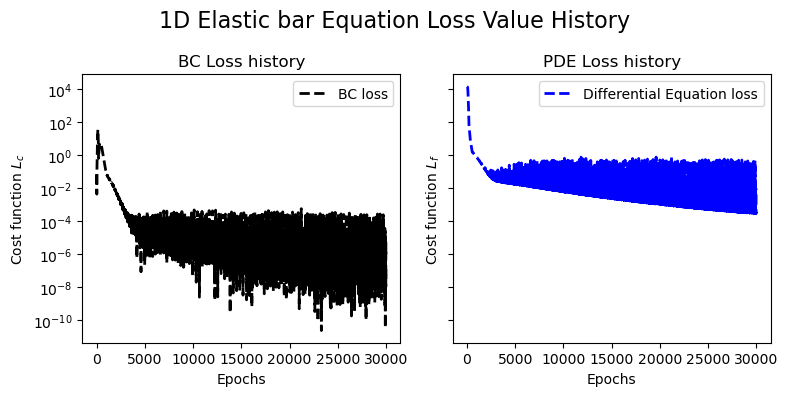

True

In [57]:
plot_LossFunction(df, bc_='bcLoss', pde_='pdeLoss', title_="1D Elastic bar Equation Loss Value History")

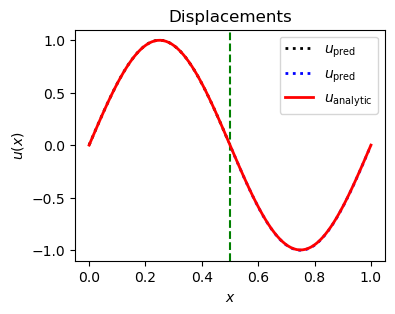

In [58]:
# Test data
x_test = generate_grid_1d_1DElasticBar(L, samples=nTesting, dtype=dtype, device=device, extrapolate_=True)
u_test = pinnModel.get_displacements(x_test)
u_analytic = lambda x, L=1.0: np.sin(2 * np.pi * x / L) # L = 1.00
pin.plot_displacements_bar_1DElasticBar(x_test, u_test, u_analytic, extrapolate_=True)

# Deflated 1D Elastic Bar

### The loss Function:

\begin{align}
C &= MSE_b + MSE_f,\\
  &= \frac{1}{N_b}\sum^{N_b}_{i=1}{(u_{NN}(x_b^i)-u_b^i)^2} + \frac{1}{N_f}\frac{\sum_{i=1}^{N_f}f_{NN}(x_f^i)^2}{\sum_{i=1}^{N_f}|u_{NN}(x_f^i) - u_{0}(x_f^i)| d(x_f^i, u_b^i)}
\end{align}

where $g(x_f^i, u_b^i)$ is the distance function between collocation points to the closest boundary. $g$ is used to make sure that if another solution is found, it still be able to use the same BC values.

$d(x_b^i, u_b^i) = min\{ |x_f^i - u_b^i| \}, i = 1, 2, ..., N_b$


# <center><font color="green">Dysts - ODE/PDB</font></center>

### https://github.com/williamgilpin/dysts

> William Gilpin. "Chaos as an interpretable benchmark for forecasting and data-driven modelling" Advances in Neural Information Processing Systems (NeurIPS) 2021 https://arxiv.org/abs/2110.05266

<center><img alt="" src="images/pdb-pdp/dysts_clusters.png"/></center> 

In [59]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install dysts
    !pip install darts
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [60]:
from dysts.datasets import load_dataset

Datasets = load_dataset(subsets="train").names.tolist()
print("All Available ({}) Datasets:\n\n{}".format(len(Datasets), Datasets))

All Available (131) Datasets:

['Aizawa', 'AnishchenkoAstakhov', 'Arneodo', 'ArnoldBeltramiChildress', 'ArnoldWeb', 'BeerRNN', 'BelousovZhabotinsky', 'BickleyJet', 'Blasius', 'BlinkingRotlet', 'BlinkingVortex', 'Bouali', 'Bouali2', 'BurkeShaw', 'CaTwoPlus', 'CaTwoPlusQuasiperiodic', 'CellCycle', 'CellularNeuralNetwork', 'Chen', 'ChenLee', 'Chua', 'CircadianRhythm', 'CoevolvingPredatorPrey', 'Colpitts', 'Coullet', 'Dadras', 'DequanLi', 'DoubleGyre', 'DoublePendulum', 'Duffing', 'ExcitableCell', 'Finance', 'FluidTrampoline', 'ForcedBrusselator', 'ForcedFitzHughNagumo', 'ForcedVanDerPol', 'GenesioTesi', 'GuckenheimerHolmes', 'Hadley', 'Halvorsen', 'HastingsPowell', 'HenonHeiles', 'HindmarshRose', 'Hopfield', 'HyperBao', 'HyperCai', 'HyperJha', 'HyperLorenz', 'HyperLu', 'HyperPang', 'HyperQi', 'HyperRossler', 'HyperWang', 'HyperXu', 'HyperYan', 'HyperYangChen', 'IkedaDelay', 'IsothermalChemical', 'ItikBanksTumor', 'JerkCircuit', 'KawczynskiStrizhak', 'Laser', 'LiuChen', 'Lorenz', 'Lorenz84

## <strong><font color="blue"> ODE 03: Lorenz </font></strong>

> Lorenz, E. N. (1963). Deterministic nonperiodic flow. Journal of atmospheric sciences, 20(2), 130-141.

Lorenz system:
\begin{align}
\frac{dx}{dt}&=a(y-x),\\
\frac{dy}{dt}&=x(b-z)-y,\\
\frac{dz}{dt}&=xy-cz.
\end{align}

* $a,b,c = 10, 28, 8/3$

In [11]:
data = 'Lorenz'
train_ = load_dataset(subsets="train", data_format="pandas", univariate=False).loc[data]
test_ = load_dataset(subsets="test", data_format="pandas", univariate=False).loc[data]
val_ = load_dataset(subsets="test_val", data_format="pandas", univariate=False, noise=True).loc[data]

train_

,id,time,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8,values_9
Lorenz,63.0,0.000000,0.687909,0.579656,-0.112561,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,0.015021,0.681812,0.611982,-0.191794,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,0.030041,0.681866,0.648275,-0.265675,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,0.045062,0.687725,0.688560,-0.333966,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,0.060082,0.699252,0.733040,-0.396074,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Lorenz,63.0,14.945415,-1.144725,-0.684438,1.028214,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,14.960435,-1.084616,-0.599736,0.993607,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,14.975456,-1.020670,-0.525255,0.942567,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorenz,63.0,14.990476,-0.955072,-0.462442,0.878184,0.0,0.0,0.0,0.0,0.0,0.0,0.0


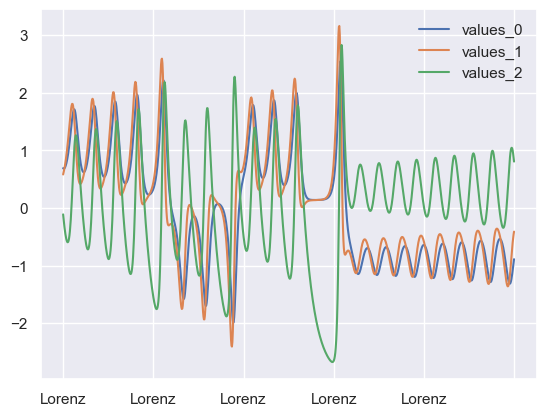

In [12]:
p = train_[['values_0', 'values_1', 'values_2']].plot()

# <center><font color="blue">DARTS - Forecasting</font></center>

* https://github.com/unit8co/darts

<img alt="" src="images/MLDE/darts.png"/>

# <center><font color="blue">DARTS - Models</font></center>

* https://github.com/unit8co/darts

<img alt="" src="images/MLDE/darts_models.png"/>


In [13]:
df = pd.concat([train_, test_], ignore_index=True) # , keys=["Train", "Test", "Validation"]
df.drop(['id'], axis=1, inplace=True)
df = df[['values_0']]#sol[['time', 'values_0']]
df.columns = ['y']
print(df.shape)
df.head()

(2000, 1)


,y
0,0.687909
1,0.681812
2,0.681866
3,0.687725
4,0.699252


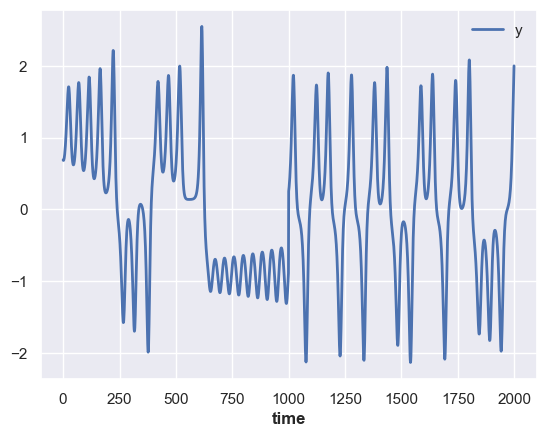

In [14]:
import darts 

series = darts.TimeSeries.from_dataframe(df, time_col=None, value_cols='y')
series.plot()

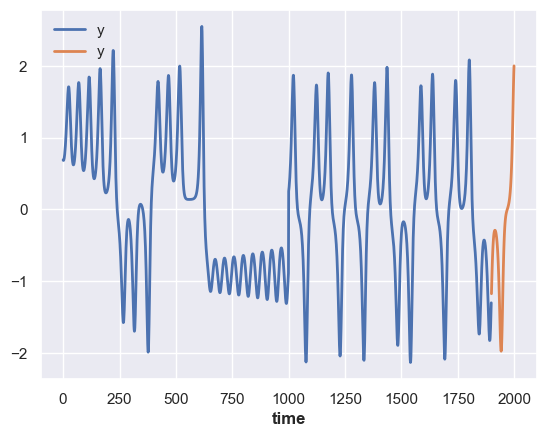

In [15]:
train, test = series.split_before(0.95)
train.plot()
test.plot()

In [16]:
from darts.models import RNNModel

model = RNNModel(model="GRU", input_chunk_length=20)
model.fit(train)
prediction = model.predict(len(test))

2022-09-20 07:26:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: True (cuda), used: False
2022-09-20 07:26:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-09-20 07:26:53 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-09-20 07:26:53 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-09-20 07:26:53 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 2.1 K 
4 | V             | Linear           | 26    
---------------------------------------------------
2.1 K     Trainable params
0         Non-trainable params
2.1 K     Total params
0.017     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

2022-09-20 07:28:53 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


Predicting: 59it [00:00, ?it/s]

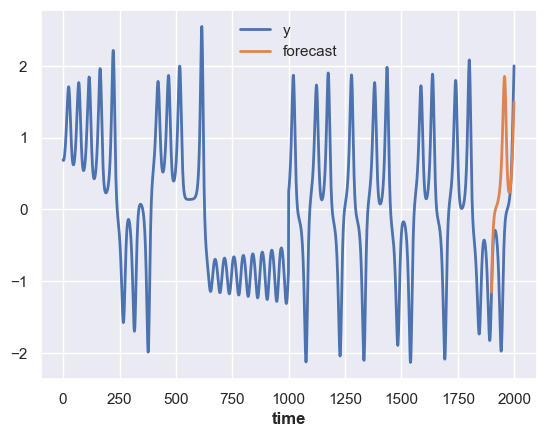

In [17]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [18]:
from darts.metrics import mape

"MAPE: {:.2f}%".format(mape(prediction, test))

'MAPE: 852.38%'

# <center><font color="blue">Darts Also Support</font></center>


* Parameter Optimization
* Cross Validations
* Add Noise (sensitivity Analysis)
* Parallel GPU-TPU
* and More.

# <center><font color="blue"> Akhir Modul</font></center>

<hr />
<img alt="" src="images/meme-cartoon/meme arima.jpeg"/>